In [1]:
import pandas as pd
import datetime 

In [2]:
df = pd.read_csv('volume-2017-2019.csv', names=['month','year','volume_in_ml'], delim_whitespace=True,
                dtype={'year': 'object'})
df.index = df.apply(lambda se: datetime.datetime.strptime('1' + se.month + se.year, '%d%B%Y'), axis=1)
df = df[['volume_in_ml']]
df

volume_in_ml
2017-01-01         580.4
2017-02-01         675.2
2017-03-01         964.9
2017-04-01         471.8
2017-05-01         595.2
2017-06-01         378.3
2017-07-01         403.3
2017-08-01         605.8
2017-09-01         287.1
2017-10-01         640.3
2017-11-01         529.5
2017-12-01         442.2
2018-01-01         680.7
2018-02-01         688.9
2018-03-01         495.9
2018-04-01         485.8
2018-05-01         652.5
2018-06-01         466.0
2018-07-01         504.9
2018-08-01         395.6
2018-09-01         216.4
2018-10-01         614.4
2018-11-01         510.8
2018-12-01         406.5
2019-01-01         847.2
2019-02-01         484.1
2019-03-01         703.3
2019-04-01         446.7
2019-05-01         550.6
2019-06-01         385.8
2019-07-01         571.0
2019-08-01         555.6
2019-09-01         653.9
2019-10-01         525.7
2019-11-01         546.7

In [3]:
number_of_months = 12 * 3

In [4]:
(482.4+442.2+406.5)/3

443.7

In [5]:
dti = pd.date_range('2017-01-01', periods=number_of_months, freq='MS')
df_full = pd.DataFrame([x for x in range(number_of_months)], dti, columns=['delme'])
df = df.merge(df_full, how='right' ,left_index=True, right_index=True, validate='one_to_one')
del df['delme']
df.loc['2019-12-01'] = 443.7
df

volume_in_ml
2017-01-01         580.4
2017-02-01         675.2
2017-03-01         964.9
2017-04-01         471.8
2017-05-01         595.2
2017-06-01         378.3
2017-07-01         403.3
2017-08-01         605.8
2017-09-01         287.1
2017-10-01         640.3
2017-11-01         529.5
2017-12-01         442.2
2018-01-01         680.7
2018-02-01         688.9
2018-03-01         495.9
2018-04-01         485.8
2018-05-01         652.5
2018-06-01         466.0
2018-07-01         504.9
2018-08-01         395.6
2018-09-01         216.4
2018-10-01         614.4
2018-11-01         510.8
2018-12-01         406.5
2019-01-01         847.2
2019-02-01         484.1
2019-03-01         703.3
2019-04-01         446.7
2019-05-01         550.6
2019-06-01         385.8
2019-07-01         571.0
2019-08-01         555.6
2019-09-01         653.9
2019-10-01         525.7
2019-11-01         546.7
2019-12-01         443.7

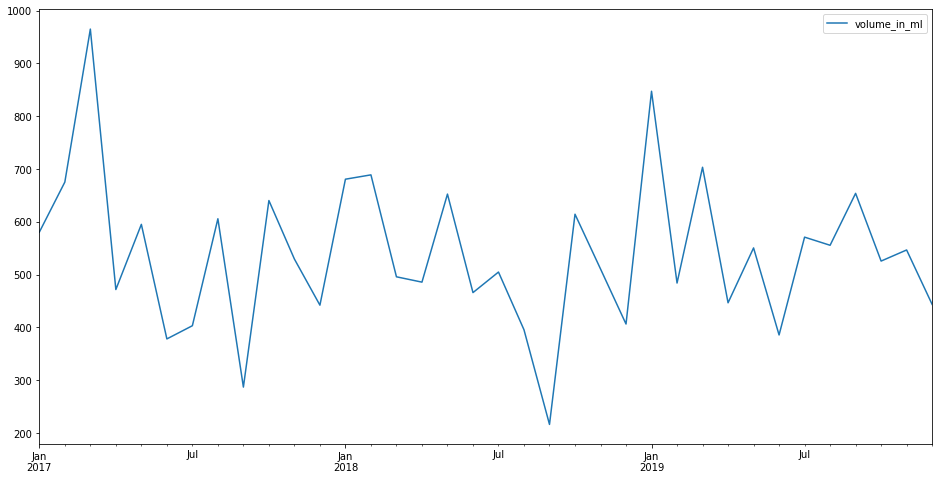

In [6]:
df.plot(figsize=(16,8))

In [7]:
580.4/31

18.72258064516129

In [8]:
number_of_days = 365 * 3

In [9]:
dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
df = df.merge(df_full, how='right' ,left_index=True, right_index=True, validate='one_to_one')
del df['delme']
df.volume_in_ml.fillna(method='ffill', inplace=True)


In [10]:
df.volume_in_ml = df.apply(lambda se: round(se.volume_in_ml / se.name.days_in_month, 1), axis=1)
df

volume_in_ml
2017-01-01          18.7
2017-01-02          18.7
2017-01-03          18.7
2017-01-04          18.7
2017-01-05          18.7
...                  ...
2019-12-27          14.3
2019-12-28          14.3
2019-12-29          14.3
2019-12-30          14.3
2019-12-31          14.3

[1095 rows x 1 columns]

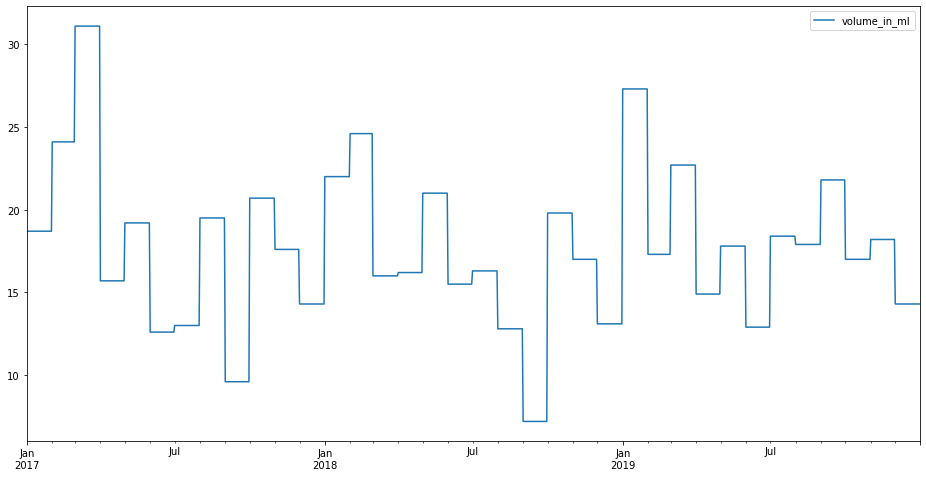

In [11]:
df.plot(figsize=(16,8))

In [12]:
df.to_csv('other-features/fuel_volume_ml_2017-2019.csv',index_label='date')